In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [4]:
data_train.shape

(891, 12)

In [5]:
data_test.shape

(418, 11)

In [6]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Types

In [26]:
data_train.info()
print('_'*40)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

## Null Values

In [11]:
print(data_test.isnull().values.any())
print(data_train.isnull().values.any())

True
True


In [14]:
missing_df_train = data_train.isnull().sum(axis=0).reset_index()
missing_df_train.columns = ['Variable', 'Somme']
missing_df_train['Pourcentage'] = round((missing_df_train['Somme'] / data_train.shape[0])*100)
missing_df_train

,Variable,Somme,Pourcentage
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,177,20.0
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


We can observe high percentages of missing values in the train set:
- 20% of the 'Age' instances
- 77% of the 'Cabin' instances

In [15]:
missing_df_test = data_test.isnull().sum(axis=0).reset_index()
missing_df_test.columns = ['Variable', 'Somme']
missing_df_test['Pourcentage'] = round((missing_df_test['Somme'] / data_test.shape[0])*100)
missing_df_test

,Variable,Somme,Pourcentage
0,PassengerId,0,0.0
1,Pclass,0,0.0
2,Name,0,0.0
3,Sex,0,0.0
4,Age,86,21.0
5,SibSp,0,0.0
6,Parch,0,0.0
7,Ticket,0,0.0
8,Fare,1,0.0
9,Cabin,327,78.0


We can observe high percentages of missing values in the test set:
- 21% of the 'Age' instances
- 78% of the 'Cabin' instances

# Class Distribution

In [18]:
data_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

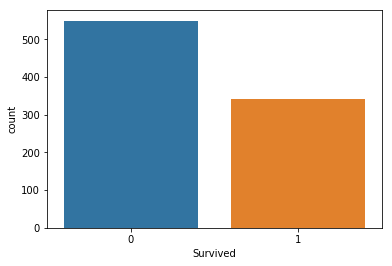

In [22]:
sns.countplot(data_train['Survived'],label="Survived")

# Numerical Features Distribution

In [28]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Categorical Features Distribution

In [29]:
data_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

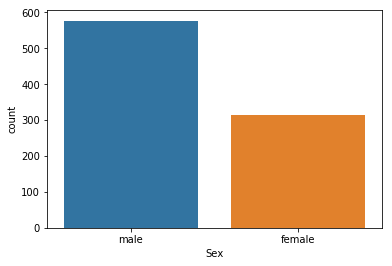

In [31]:
sns.countplot(data_train['Sex'],label="Sex")

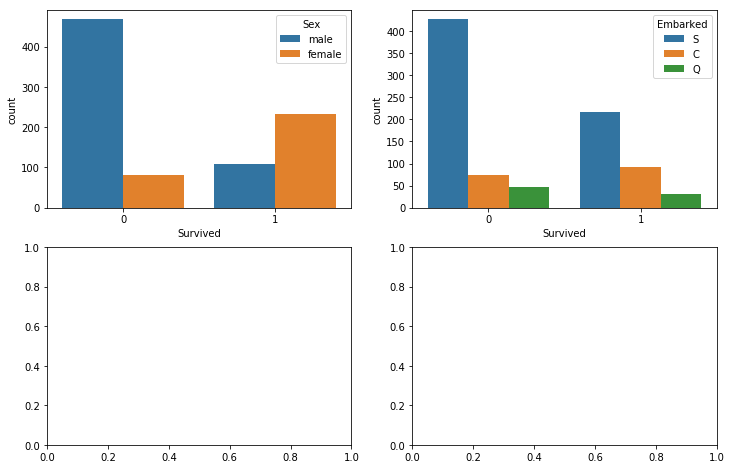

In [40]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x="Survived", hue="Sex", data=data_train, ax=axarr[0][0])
sns.countplot(x="Survived", hue="Embarked", data=data_train, ax=axarr[0][1])